### This model has been built using support vector machine model

**importing the dependencies**

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**processing the data**

In [70]:
loan_data = pd.read_csv('./loan_data.csv')

In [71]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [72]:
loan_data.shape

(614, 13)

In [73]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**checking if there is any missing values**

In [74]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**removing the missing values**

In [75]:
loan_data = loan_data.dropna()

**label encoding**

In [76]:
loan_data.replace({"Loan_Status":{'N':0, 'Y':1}},inplace=True)

/tmp/ipykernel_900/115553979.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({"Loan_Status":{'N':0, 'Y':1}},inplace=True)
/tmp/ipykernel_900/115553979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.replace({"Loan_Status":{'N':0, 'Y':1}},inplace=True)


**dependent column values**

In [77]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

**replacing the of 3+ to 4**

In [78]:
loan_data = loan_data.replace(to_replace='3+', value='4')

**data visualization**

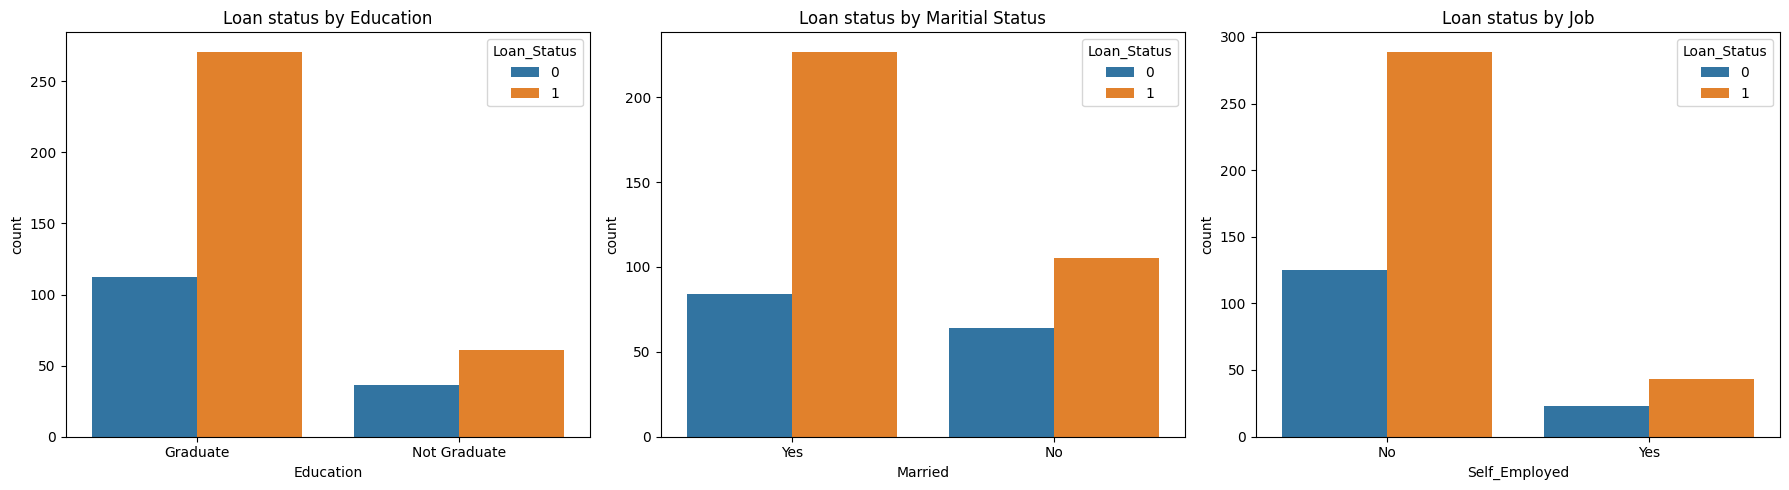

In [79]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)
plt.title('Loan status by Education')

plt.subplot(1,3,2)
sns.countplot(x='Married', hue='Loan_Status', data=loan_data)
plt.title('Loan status by Maritial Status')

plt.subplot(1,3,3)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data)
plt.title('Loan status by Job')

plt.tight_layout()
plt.show()

**convert categorical column to numerical values**

In [80]:
loan_data.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

/tmp/ipykernel_900/4235566700.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [81]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


**separating the data and label**

In [85]:
X = loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_data['Loan_Status']

**splitting the data into training and test data**

In [88]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

**training the model**

In [89]:
classifier = svm.SVC(kernel='linear')

In [90]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

**model evaluation**

In [91]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f"accuracy on training data: {training_data_accuracy}")

accuracy on training data: 0.7986111111111112


In [92]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(f"accuracy on test data: {test_data_accuracy}")

accuracy on test data: 0.8333333333333334
